Данные взяты из [источника](https://networkrepository.com/networks.php). Описывают связи в мозге у мыши 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import random
from collections import Counter
import powerlaw
%matplotlib inline

In [4]:
G = nx.read_weighted_edgelist('bn-mouse_brain_1.edges', delimiter=' ')
print('Nodes:',G.number_of_nodes()) 
print('Edges:',G.number_of_edges())
print('Density:',nx.density(G)) 

Nodes: 213
Edges: 16242
Density: 0.7193728408184958



*  Распределение коэффициента кластеризации и его значения. Вершины с нулевой кластеризацией и с единичной

*  Коэффициент корреляции Пирсона степени и коэффициент кластеризации вершин;

*  Число компонет связности и распределение размера компонент связности

* Локальная эффективность максимальной компоненты на устойчивость.


In [5]:
nodes = [node for (node, d) in G.degree()]
degrees = [d for (node, d) in G.degree()]

In [6]:
clust_dict = nx.clustering(G)
clust_dict

{'0': 0.7739514348785872,
 '7': 0.746749226006192,
 '11': 0.7897980592709153,
 '13': 0.7699281370923162,
 '14': 0.7575730092508616,
 '15': 0.7895949058393171,
 '26': 0.7751566040250566,
 '28': 0.7354744702811001,
 '31': 0.7312987012987013,
 '32': 0.7793548387096774,
 '38': 0.7460387002555677,
 '43': 0.7483905173066727,
 '44': 0.7431565440547476,
 '48': 0.7554347826086957,
 '55': 0.7319480519480519,
 '61': 0.7355169179712864,
 '63': 0.7782143341010703,
 '64': 0.7322283609576428,
 '71': 0.7548284480799818,
 '72': 0.7526404902039829,
 '74': 0.7273996721510534,
 '75': 0.7625950782997762,
 '81': 0.7621348056130665,
 '83': 0.7878787878787878,
 '86': 0.7251688152240638,
 '88': 0.760636645962733,
 '89': 0.8055019305019305,
 '90': 0.76751677852349,
 '93': 0.7490123357252277,
 '99': 0.7772319319792159,
 '103': 0.7512698540675643,
 '107': 0.7913764510779436,
 '110': 0.7517385839966485,
 '116': 0.7435816960642772,
 '119': 0.7289160127869805,
 '120': 0.7214070351758795,
 '121': 0.721716378859236,
 

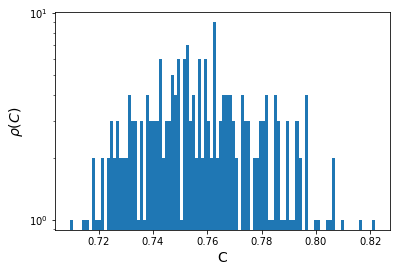

In [7]:
a=plt.hist(clust_dict.values(), bins=100, log=True)
plt.xlabel('C', fontsize=14)
plt.ylabel(r'$\rho(C)$', fontsize=14)
plt.show()

In [8]:
print(nx.average_clustering(G)) #в среднем 0.758

0.7582617796845521


Text(0, 0.5, 'C')

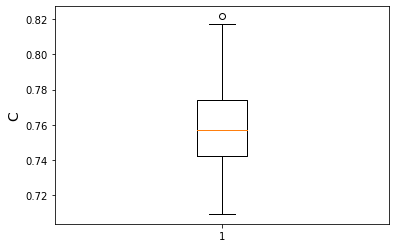

In [9]:
b = plt.boxplot(clust_dict.values())
plt.ylabel('C', fontsize=14) #нулевых и единичных значений нет

In [10]:
np.corrcoef(degrees, list(clust_dict.values()))[0][1] #коэффициент корреляции Пирсона

-0.8253383119419977

In [11]:
print(nx.is_connected(G))

True


In [12]:
scc = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
scc
#граф связный, поэтому длина максимальной компоненты 213

[213]

In [13]:
eps = 0.05
G_copy = G.copy()
n = int(eps * G.number_of_edges())
local_efficiency = []
local_efficiency.append(nx.local_efficiency(G))

for i in range(10):
    edges_num = G_copy.number_of_edges()
    remove_edges_ind = random.choices(np.arange(0, edges_num), k=n)
    remove_edges = [list(G_copy.edges)[edge_index] for edge_index in remove_edges_ind]
    G_copy.remove_edges_from(remove_edges)
    local_efficiency.append(nx.local_efficiency(G_copy))

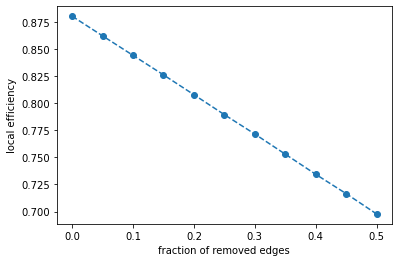

In [14]:
plt.plot(np.linspace(0,10*eps,11), local_efficiency,'o--')
plt.xlabel('fraction of removed edges')
plt.ylabel('local efficiency')
plt.show()

*  Распределение степеней и какому закону подчиняется, оценка параметров распределения.

*  Коэффициент ассортативности сети. 

*  Функция корреляции степеней.

* Функция разложения сети по k-core. 

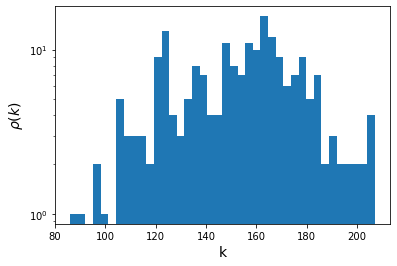

In [15]:
a=plt.hist(degrees, bins=40, log=True)
plt.xlabel('k', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)
plt.show()

In [16]:
fit = powerlaw.Fit(degrees, discrete=True)
print('Alpha = ', fit.power_law.alpha)
print('Xmin = ', fit.power_law.xmin)

Calculating best minimal value for power law fit
Alpha =  7.520286606145777
Xmin =  144.0


In [17]:
print(nx.degree_assortativity_coefficient(G))

-0.06271067682220238


In [18]:
G_copy=G.remove_edges_from(nx.selfloop_edges(G))

In [20]:
k = np.arange(1, max(degrees))

In [21]:
kG_lst = []

for degree in k[:50]:
    kG=nx.k_core(G,k=degree)
    kG_lst.append(len(kG.nodes()) / len(nodes))

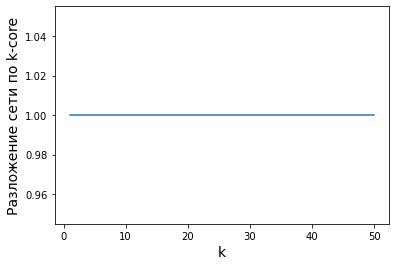

In [22]:
plt.plot(k[:50], kG_lst)
plt.xlabel('k', fontsize=14)
plt.ylabel('Разложение сети по k-core', fontsize=14)
plt.show()

### Моделирование и рандомизация 


* Для произвольной (неслучайной) сети подобраны параметры моделей Эрдеша-Реньи, Барабаши-Альберта. Построены соответсвующие случайные сети и определено какая из моделей лучше описывает тут или иную характеристику сети. 

* Построена конфигурационную модель для выбранной сети.

* Написана функция, осуществляющая заданное число шагов $Q$ рандомизации. 

* Построена зависимость сетевых характеристик от числа рандомизиции $f$.  

модель Барабаши-Альберта

In [23]:
k = G.number_of_edges() / G.number_of_nodes()
k

75.53521126760563

In [24]:
gnm = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges())
ba = nx.barabasi_albert_graph(G.number_of_nodes(), int(k) + 1)

In [25]:
print('GNM Number of nodes = ', gnm.number_of_nodes(), 'Number of edges = ', gnm.number_of_edges())
print('BA Number of nodes = ', ba.number_of_nodes(), 'Number of edges = ', ba.number_of_edges())

GNM Number of nodes =  213 Number of edges =  16089
BA Number of nodes =  213 Number of edges =  10412


In [26]:
degrees_gnm = [d for node, d in gnm.degree()]
degrees_ba = [d for node, d in ba.degree()]
print('G Average degree =',np.mean(degrees))
print('GNM Average degree =',np.mean(degrees_gnm))
print('BA Average degree =',np.mean(degrees_ba))

G Average degree = 152.50704225352112
GNM Average degree = 151.07042253521126
BA Average degree = 97.76525821596245


In [29]:
def network_spec(G):
    clust = round(nx.average_clustering(G), 3)
    transitiv = round(nx.transitivity(G), 3)
    assort_coef = round(nx.degree_assortativity_coefficient(G), 3)
    return clust, transitiv, assort_coef

In [30]:
spec = [network_spec(G), network_spec(gnm), network_spec(ba)]
print(pd.DataFrame(spec, columns = ['Clustering', 'Transitivity', 'Degree_assortativity_coefficient'], index = ['G', 'GNM', 'BA']))

     Clustering  Transitivity  Degree_assortativity_coefficient
G         0.758         0.752                            -0.067
GNM       0.712         0.712                            -0.011
BA        0.600         0.548                            -0.233


Конфигурационная модель